In [1]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


- Find unwanted columns
- Find missing values
- Find features with one value
- Explore the categorical features
- Find categorical feature distribution
- Relationship between categorical features and label
- Explore numerical features
- find discrete numerical features
- Relationship between Discrete numerical features and labels
- Find continuous numerical features
- Distribution of continuous numerical features
- relationship between continuous numerical features and labels
- find outliers in numerical features
- explore the correlation between numerical features
- find pair plot

#### Missing values

In [7]:
## unwanted - no

## missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Get columns with one value

In [8]:
print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


#### Categorical Features

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns[:-1]

print(df[categorical_columns].nunique())

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64


#### Categorical Distribution

Number of categorical columns: 9


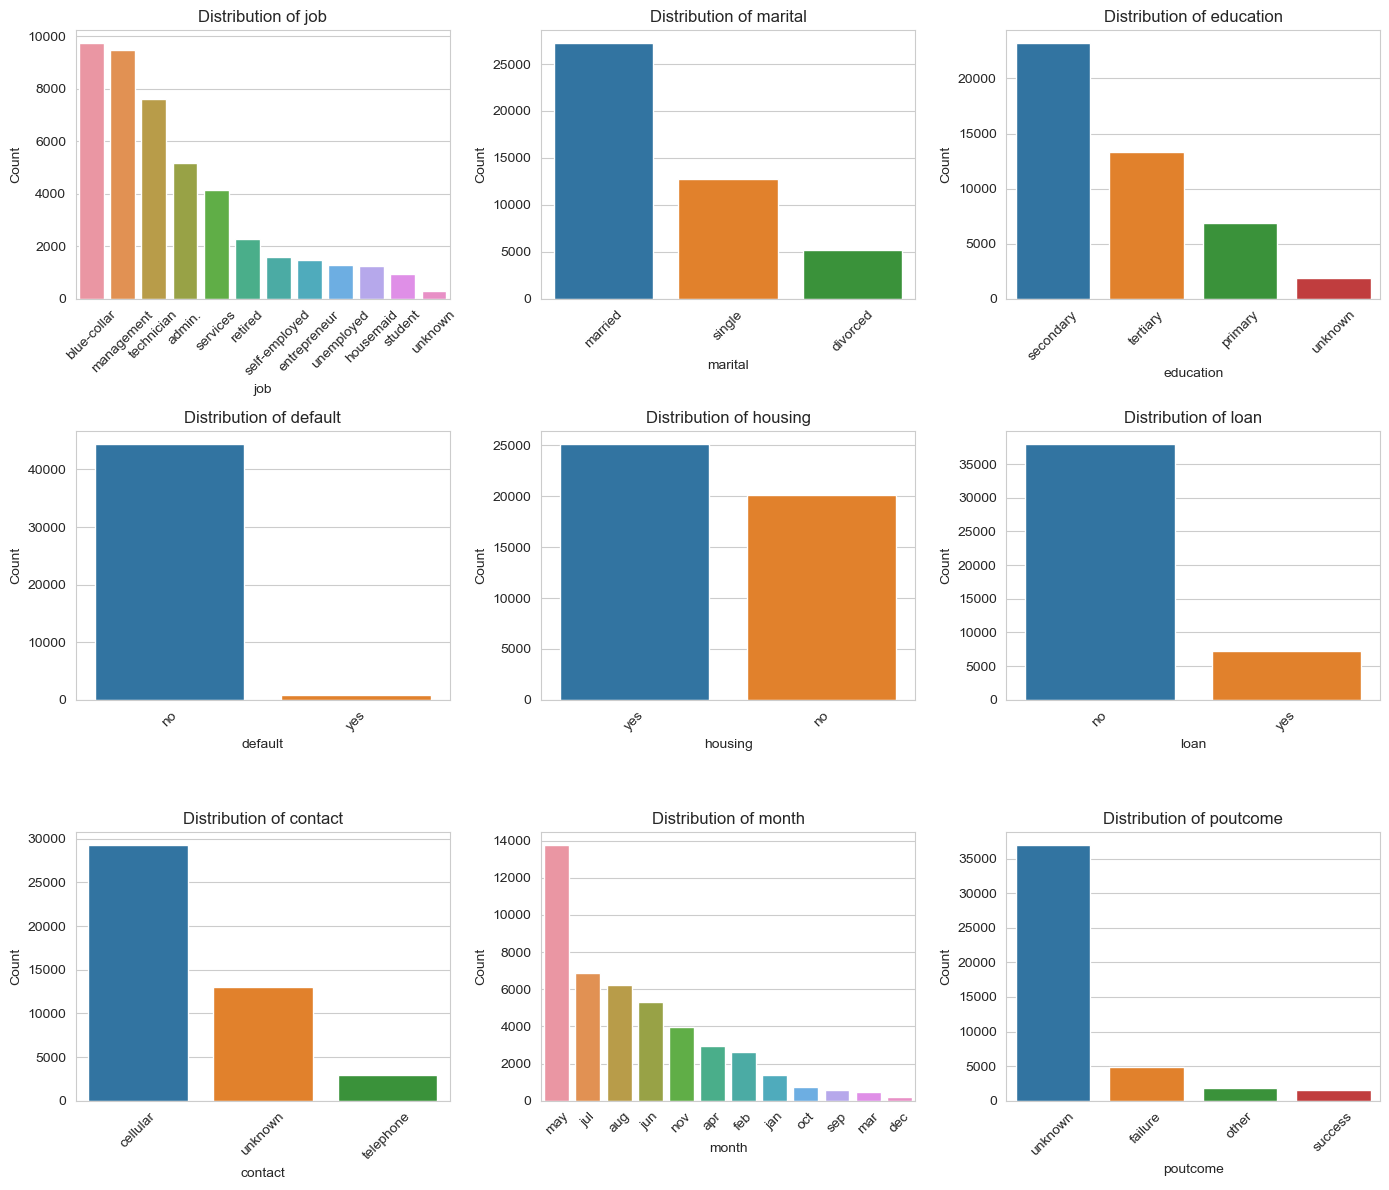

In [10]:
# Check the length of categorical_columns to avoid the IndexError
print(f"Number of categorical columns: {len(categorical_columns)}")

# Create subplots: one row, multiple columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size based on 8 subplots
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each column in a subplot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

In [11]:
# # Iterate over each categorical column and print the value counts
# for col in categorical_columns:
#     print(f"Value counts for {col}:")
#     print(df[col].value_counts())
#     print("\n")

Key Takeaways:
- Imbalance: Some features like default and poutcome show significant imbalance (e.g., most clients have no default, most previous outcomes are unknown), which could impact model performance and require techniques like oversampling or undersampling during training.
- Missing Data: Some columns have "unknown" values, which may require special handling, such as imputation or removal of rows with missing information.
- Feature Relevance: Features like job, marital, education, housing, and loan could be important for predicting whether a client subscribes to a term deposit, as they give insights into financial status and life circumstances.
- Seasonality and Timing: The distribution of the month and contact features may indicate that certain times of the year or methods of contact are more effective for marketing campaigns.

#### Relationship between Categorical features and label

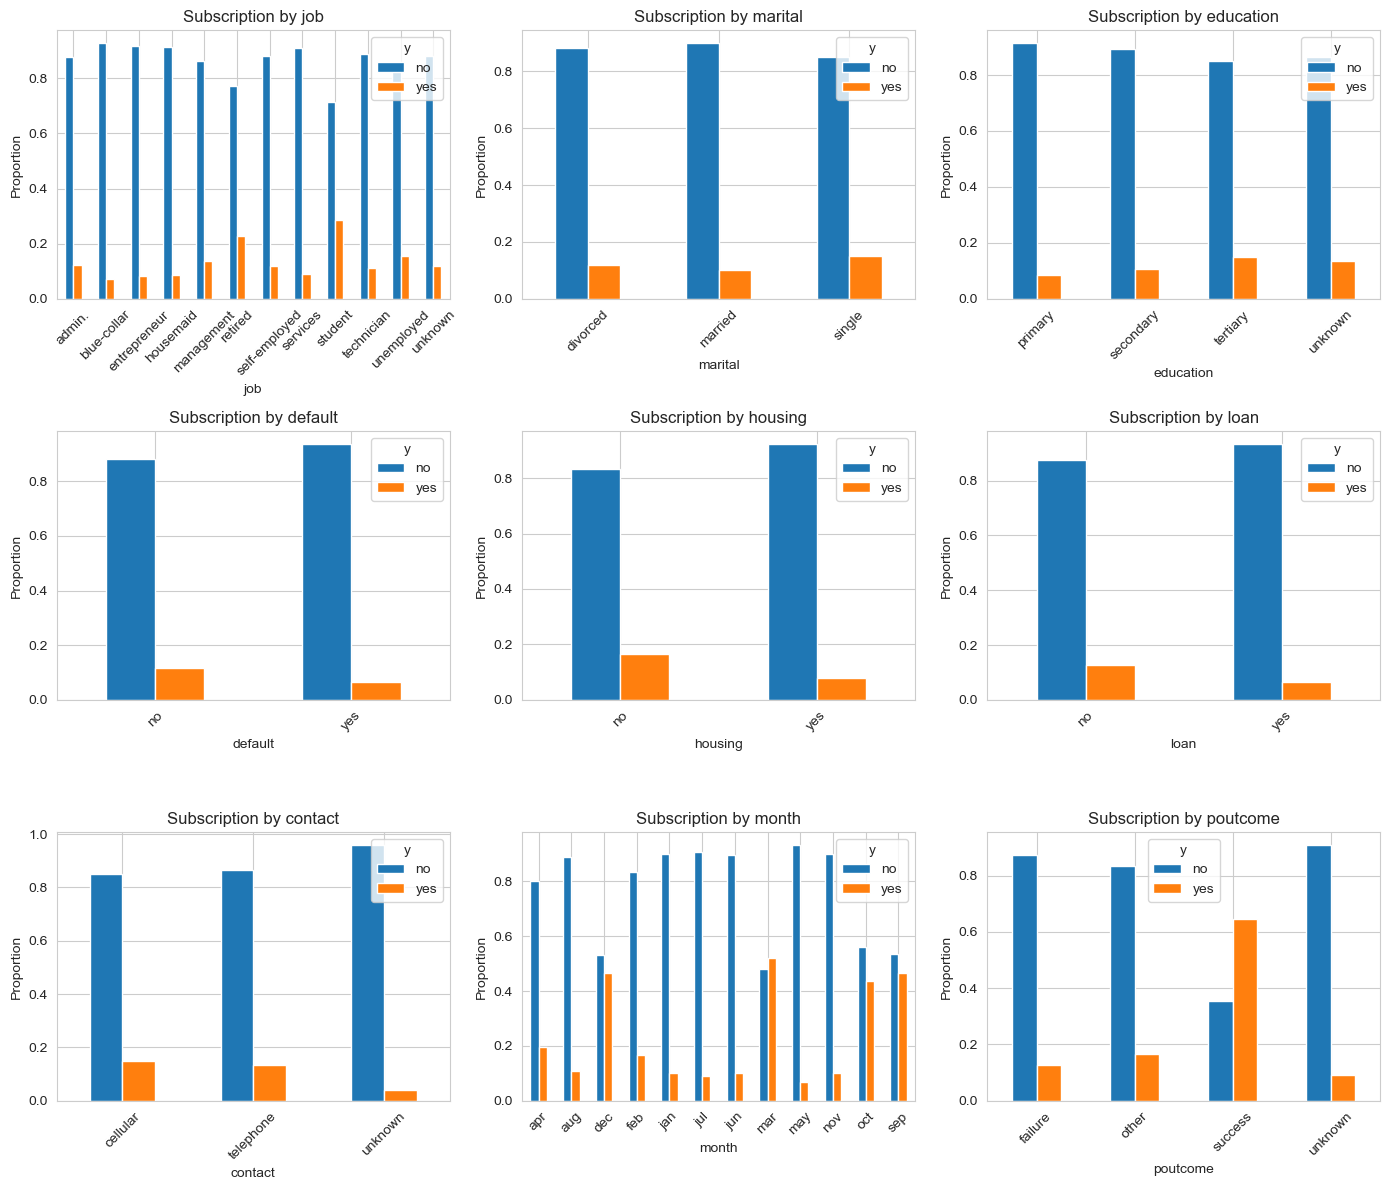

In [12]:
# Create subplots: 3 rows, 3 columns for 8 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size based on 8 subplots
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each column in a subplot
for i, col in enumerate(categorical_columns):
    # Create a crosstab to get the count of target (y) for each category
    cross_tab = pd.crosstab(df[col], df['y'], normalize='index')
    
    # Plot stacked bar plot
    cross_tab.plot(kind='bar', stacked=False, ax=axes[i], )
    
    axes[i].set_title(f"Subscription by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

In [13]:
# for category in categorical_columns:
#     print(df.groupby(['y', category]).size())

General Takeaways:
- Subscription Trends: Job, education, housing, and loan status significantly impact whether a client subscribes to a term deposit. People with managerial roles or those in the blue-collar category seem to have higher subscription rates. Clients with tertiary education also have a higher subscription rate compared to others.
- Target Skewness: For most features (except for a few like default or poutcome), there is a heavy skew towards the no class for subscription, meaning non-subscribing clients dominate the dataset.
- Feature Relevance: Some features like contact and month show a clear relationship with subscription, while others like default and poutcome have more mixed or lower impact on subscription.
- Potential Issues: Features like unknown could cause issues if not handled properly, as they have a significant number of entries.

Next Steps:
- Data Preprocessing: Handle missing values, particularly in categorical variables with high unknown values (e.g., contact, poutcome).
- Feature Engineering: You may consider encoding categorical variables using techniques such as One-Hot Encoding or Label Encoding to use them effectively in models.
- Modeling: After preprocessing, you can proceed with building models like Neural Networks and Random Forest, and compare them based on evaluation metrics like accuracy, precision, recall, and F1-score.

In [14]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
df[numerical_columns].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [16]:
# Identify discrete numerical features
discrete_features = [col for col in numerical_columns if df[col].nunique() < 20]
discrete_features

[]

In [17]:
# Identify continuous numerical features
continuous_features = [col for col in numerical_columns if df[col].nunique() >= 20]
continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### Distribution of continuous variables

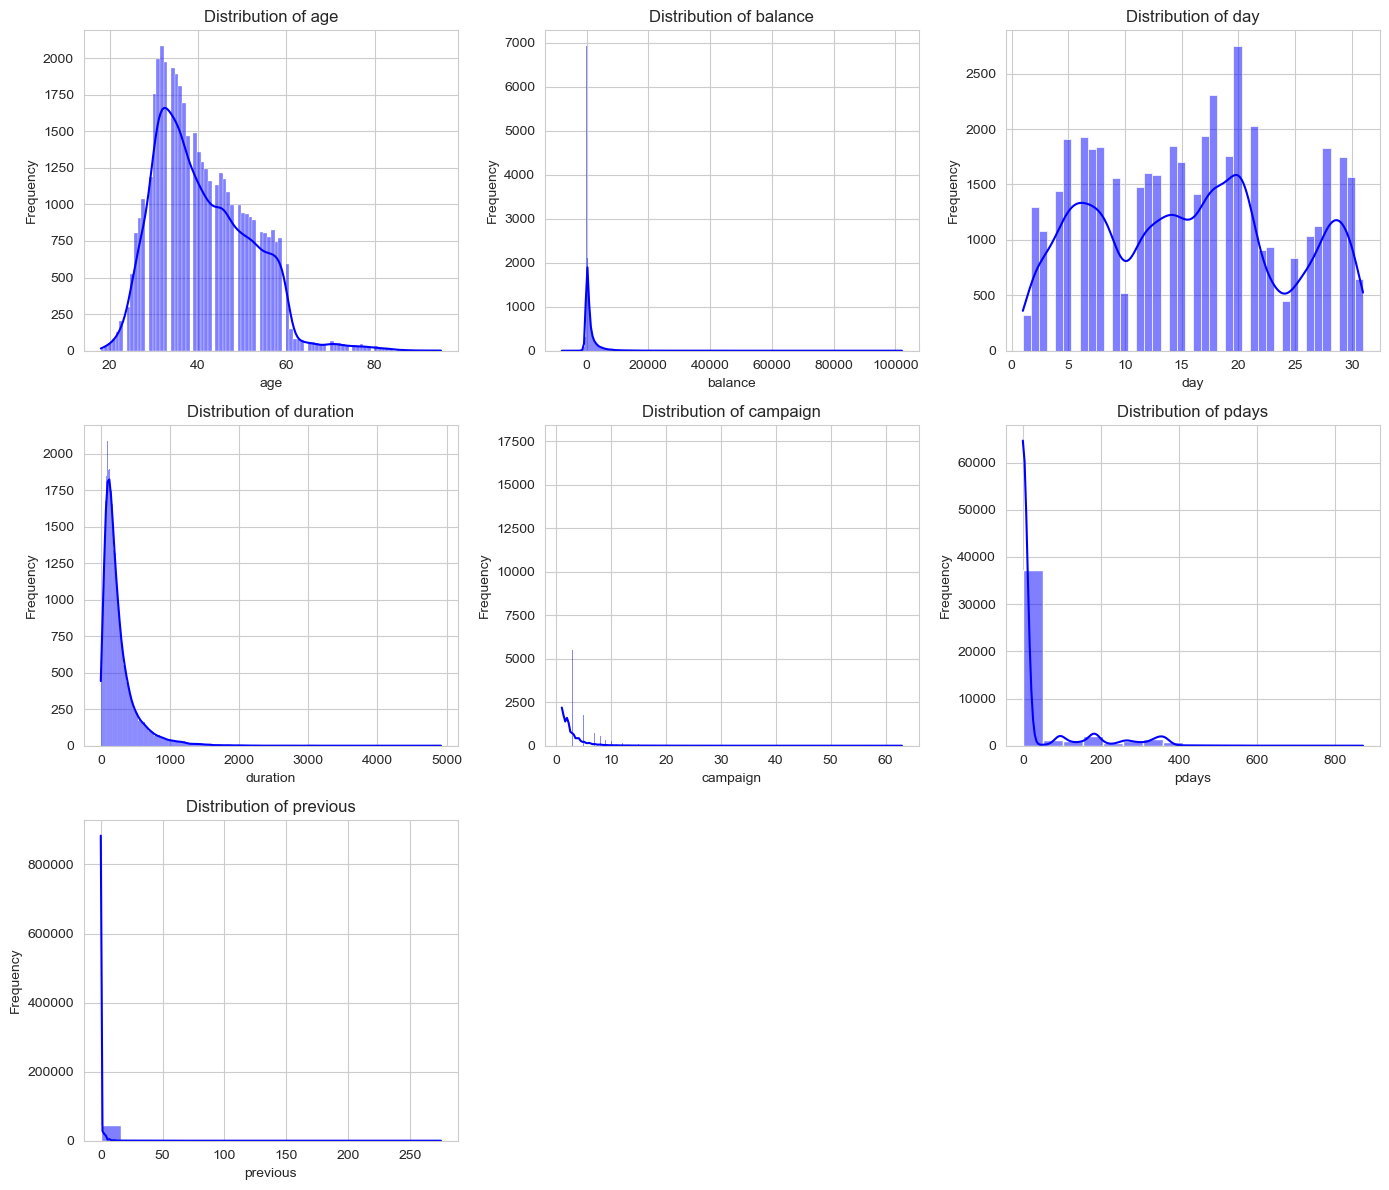

In [18]:
# Create subplots: 3 rows and 3 columns for 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each continuous column in a subplot
for i, col in enumerate(continuous_features):
    sns.histplot(data=df, x=col, kde=True, color="blue", ax=axes[i])  # Use histogram with KDE
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Turn off unused axes (if any)
for j in range(len(continuous_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

While age and days are normal, other features are heavily skewed towards left and have some outliers

#### Relationship between continuous numerical features and the label

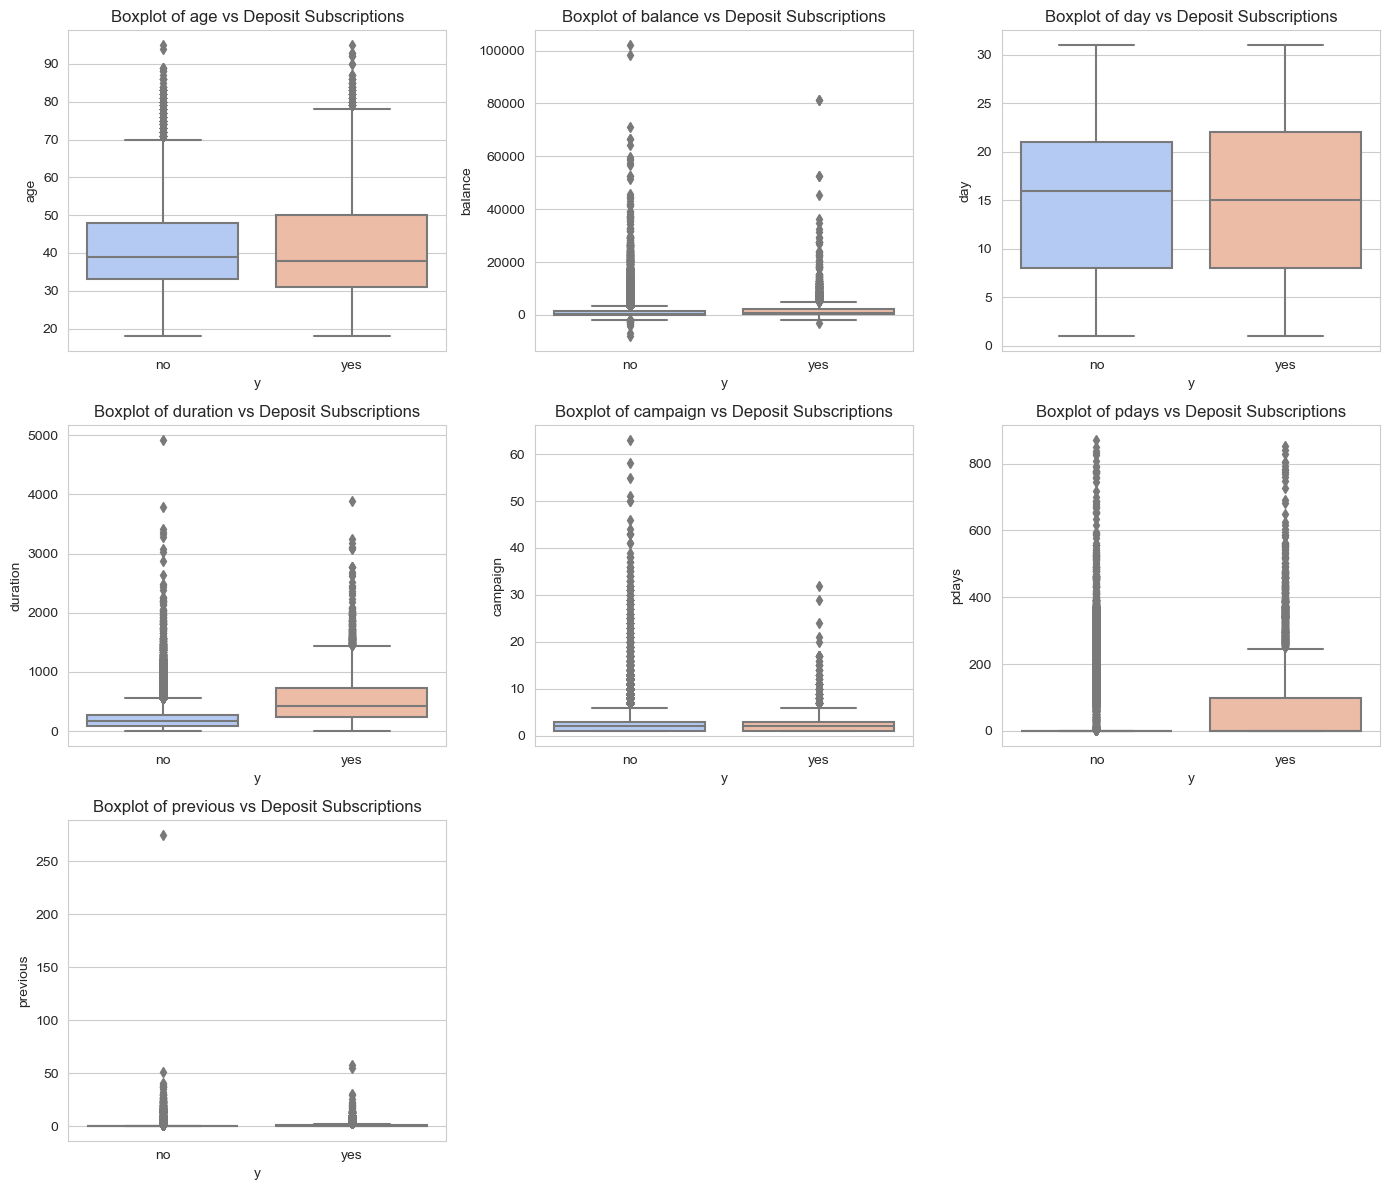

In [19]:
# Create subplots: 3 rows and 3 columns for 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each continuous column in a subplot
for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x='y', y=col, ax=axes[i], palette="coolwarm")  # Boxplot of feature vs label
    axes[i].set_title(f"Boxplot of {col} vs Deposit Subscriptions")
    axes[i].set_xlabel('y')
    axes[i].set_ylabel(col)

# Turn off unused axes (if any)
for j in range(len(continuous_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show() 

#### Finding outliers in data

Number of numerical columns: 7


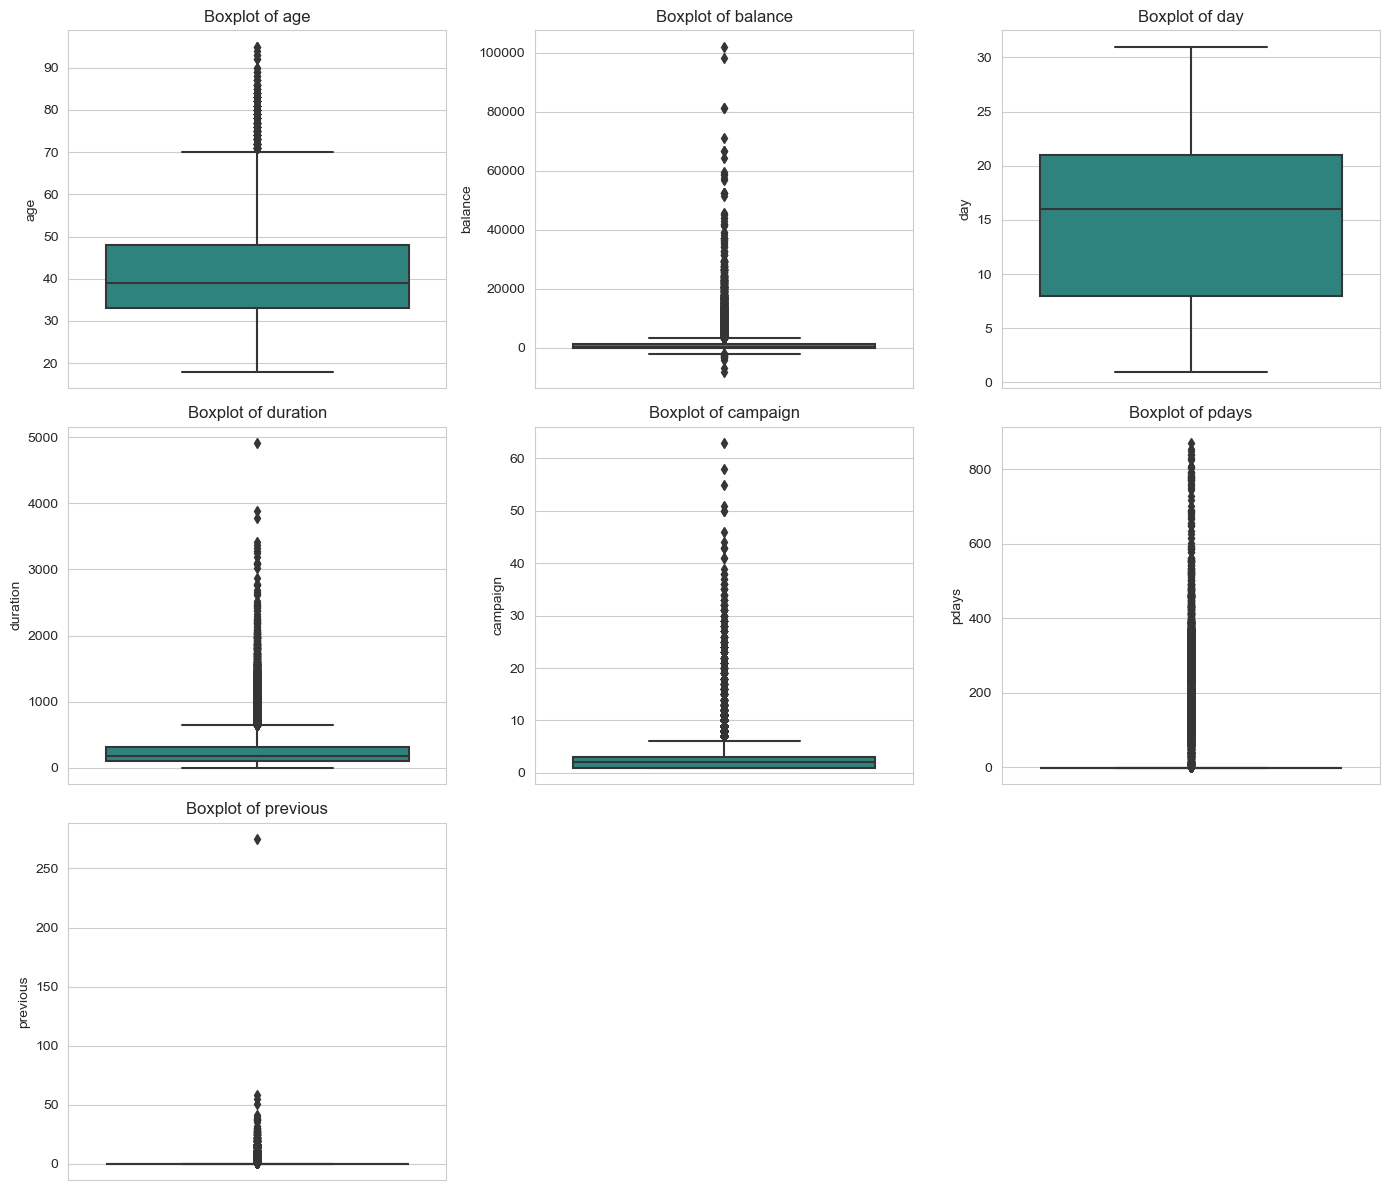

In [20]:
# Combine discrete and continuous features into one list for plotting
numerical_features = discrete_features + continuous_features

# Check the total number of numerical columns
print(f"Number of numerical columns: {len(numerical_features)}")

# Create subplots: Adjust rows and columns based on the number of features
n_features = len(numerical_features)
n_rows = (n_features + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(14, 4 * n_rows))  # Dynamic height
axes = axes.flatten()  # Flatten axes array to iterate easily

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, y=col, ax=axes[i], palette="viridis")  # Boxplot for each column
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Turn off unused axes (if any)
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


All columns except for day have some outliers

#### Explore the correlation between numerical features

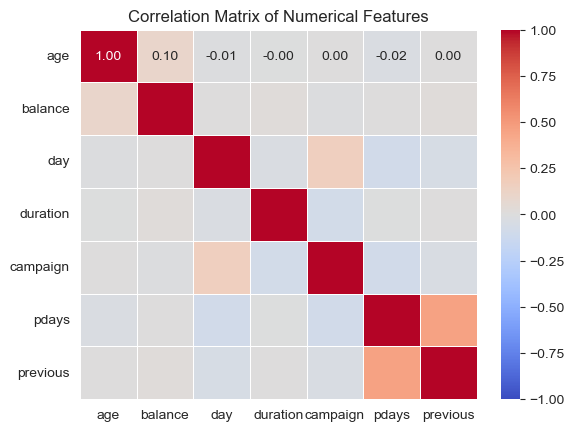

In [22]:
# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

After calculating the correlation matrix for the numerical features, most of the features were found to have weak or negligible correlations with each other, indicating minimal multicollinearity. However, one notable observation is:

- pdays and previous have a moderate positive correlation of approximately 0.5.

Interpretation:
- This suggests that there is some degree of overlap in the information provided by these two features.
- Clients who were contacted more frequently during previous campaigns may tend to have a higher number of days since the last contact, though this relationship is not extremely strong.

#### Check if the dataset if balanced or not based on target values in classification

Target Value Counts:
no     39922
yes     5289
Name: y, dtype: int64

Target Proportions (in %):
no     88.30152
yes    11.69848
Name: y, dtype: float64


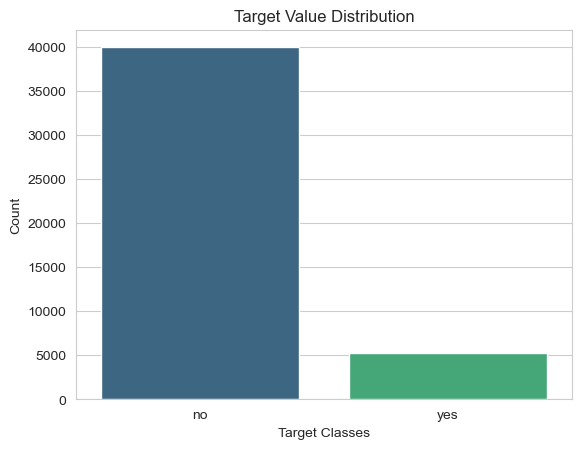

In [24]:
# Check the distribution of target values
target_counts = df['y'].value_counts()
target_proportions = df['y'].value_counts(normalize=True) * 100

# Display results
print("Target Value Counts:")
print(target_counts)
print("\nTarget Proportions (in %):")
print(target_proportions)

# Plotting the distribution
plt.figure()
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Target Value Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


Observations:
- The dataset is highly imbalanced, with the majority class (no) making up 88.30% of the data, while the minority class (yes) comprises only 11.70%.
- The imbalance indicates that the dataset may pose challenges for classification algorithms, as the model could become biased toward predicting the majority class.

### Feature Engineering

- Drop unwanted features
- Handle missing values
- Handle categorical features
- Handle feature scaling
- remove outliers

According ot Exploratory Data Analysis,
- no missing values were found
- no features with one value
- 9 categorical features
- The categorical feature default does not play an important role 
- Outliers are present 

In [26]:
df1 = df.copy()
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df1.shape

(45211, 17)

In [28]:
df1.groupby(['y', 'default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [38]:
# Total rows in the dataset
total_rows = len(df1)

# Rows where pdays is -1
negative_pdays_count = (df['default'] == 'no').sum()

# Percentage of rows with default = no
percentage_negative_pdays = (negative_pdays_count / total_rows) * 100

print(f"Percentage of rows with detault = no: {percentage_negative_pdays:.2f}%")

Percentage of rows with detault = no: 98.20%


Since more than 98% of values in the default feature column, it can be dropped due to heavy imbalence in data.

In [29]:
df1.drop(['default'], axis=1, inplace=True)

In [31]:
print(df1.groupby(['y', 'pdays']).size())

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64


In [33]:
# Total rows in the dataset
total_rows = len(df1)

# Rows where pdays is -1
negative_pdays_count = (df1['pdays'] == -1).sum()

# Percentage of rows with pdays = -1
percentage_negative_pdays = (negative_pdays_count / total_rows) * 100

print(f"Percentage of rows with pdays = -1: {percentage_negative_pdays:.2f}%")

Percentage of rows with pdays = -1: 81.74%


- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Since around 81% of the rows in pdays consist of -1 as the value, pdays can be considered as an unimportant feature

In [34]:
df1.drop(['pdays'], axis=1, inplace=True)

In [41]:
# Find outliers in 'age'
print(df1.groupby('age', sort=True)['age'].count())

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64


Analysis of age
- The age feature contains values ranging from 18 to 95.
- As all values fall within a reasonable range, no further action is required for this feature.

In [45]:
# Find outliers in 'balance'
print(df1.groupby(['balance', 'y'], sort=True)['balance'].count())

balance  y  
-8019    no     1
-6847    no     1
-4057    no     1
-3372    no     1
-3313    no     1
               ..
 66721   no     1
 71188   no     1
 81204   yes    2
 98417   no     1
 102127  no     1
Name: balance, Length: 9258, dtype: int64


Analysis of `balance`
- While there are outliers in the `balance` feature, they will not be removed.  
- Higher balances are significant, as clients with higher balances tend to show greater interest in deposits.  

In [46]:
# Find outliers in feature 'duration'
print(df1.groupby(['duration', 'y'], sort=True)['duration'].count()) 

duration  y  
0         no      3
1         no      2
2         no      3
3         no      4
4         no     15
                 ..
3366      no      1
3422      no      1
3785      no      1
3881      yes     1
4918      no      1
Name: duration, Length: 2627, dtype: int64


Analysis of `duration` 

- The `duration` feature exhibits a wide range of values, with higher durations likely indicating greater client engagement with deposits.  
- These values, even if extreme, provide meaningful insights into client behavior and should not be removed as outliers.

In [48]:
# Find outliers in 'campaign'
print(df1.groupby(['campaign', 'y'], sort=True)['duration']. count())

campaign  y  
1         no     14983
          yes     2561
2         no     11104
          yes     1401
3         no      4903
                 ...  
50        no         2
51        no         1
55        no         1
58        no         1
63        no         1
Name: duration, Length: 70, dtype: int64


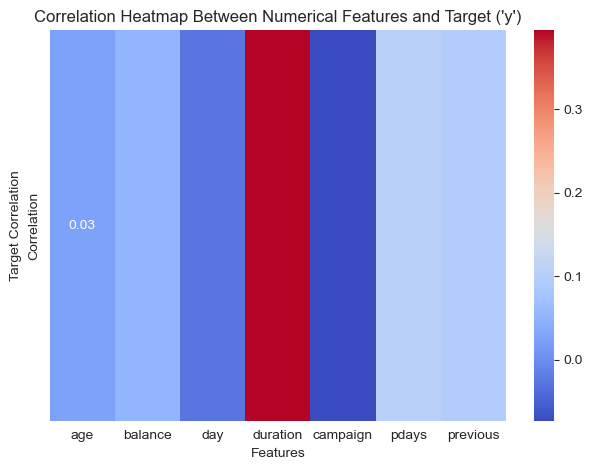

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target variable 'y' to numerical format for correlation calculation
df['y_encoded'] = df['y'].map({'yes': 1, 'no': 0})

# Select numerical features and calculate correlation with the target variable
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numerical_columns].corr()['y_encoded'].drop('y_encoded')  # Correlation with the target

# Convert to DataFrame for better visualization in heatmap
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot the heatmap
plt.figure()
sns.heatmap(correlation_df.set_index('Feature').T, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Features and Target ('y')")
plt.xlabel("Features")
plt.ylabel("Target Correlation")
plt.tight_layout()
plt.show()

# Clean up the temporary encoded column
df.drop(columns=['y_encoded'], inplace=True)

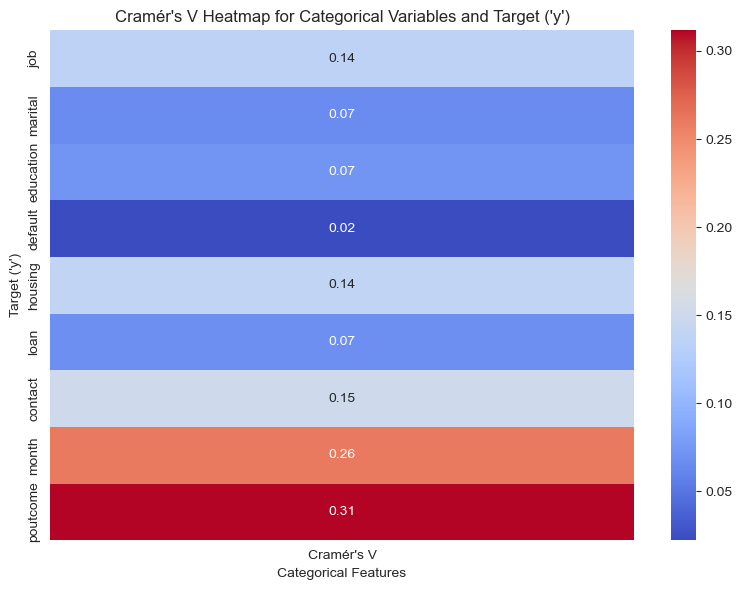

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cramér's V calculation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if chi2_stat > 0 else 0

# Initialize a dictionary to store Cramér's V values for each feature
cramers_v_values = {}

# Iterate over each categorical column and calculate Cramér's V with 'y'
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']  # Replace with your categorical columns

for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df['y'])
    if not crosstab.empty:
        cramers_v_values[col] = cramers_v(df[col], df['y'])
    else:
        cramers_v_values[col] = 0  # Assign 0 if there are no valid combinations

# Convert the dictionary to a DataFrame for easy plotting
cramers_v_df = pd.DataFrame(cramers_v_values, index=["Cramér's V"])
cramers_v_df = cramers_v_df.T  # Transpose to have features as rows

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Cramér's V Heatmap for Categorical Variables and Target ('y')")
plt.xlabel("Categorical Features")
plt.ylabel("Target ('y')")
plt.tight_layout()
plt.show()


In [56]:
print(cramers_v_df)

           Cramér's V
job          0.135990
marital      0.065926
education    0.072695
default      0.022160
housing      0.139103
loan         0.068091
contact      0.151355
month        0.260237
poutcome     0.311663
